#Importing Libraries

In [1]:
# Install Necessary Packages
!pip install pandas matplotlib seaborn plotly statsmodels scikit-learn xgboost tensorflow

In [2]:
# Install Necessary Packages
!pip install statsmodels plotly

In [3]:
# Install Necessary Packages
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib
!pip install numpy

In [4]:
# Install Necessary Packages
!pip install folium geopandas

In [5]:
# Install Necessary Packages
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [6]:
# Install Necessary Packages
!pip install dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 3.9 MB/s eta 0:00:00


In [7]:
# Install Necessary Packages
!pip show dash plotly
!pip install pyngrok dash dash-bootstrap-components

Name: dash
Version: 3.0.4
Summary: A Python framework for building reactive web-apps. Developed by Plotly.
Home-page: https://plotly.com/dash
Author: Chris Parmer
Author-email: chris@plotly.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: Flask, importlib-metadata, nest-asyncio, plotly, requests, retrying, setuptools, typing-extensions, Werkzeug
Required-by: dash-bootstrap-components
---
Name: plotly
Version: 5.24.1
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: packaging, tenacity
Required-by: cufflinks, dash, datascience, geemap


In [8]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load the dataset
import pandas as pd
data = pd.read_csv("CrimeDataset.csv")


# Exploratory Data Analysis

Missing values before: 20
Missing values after: 0


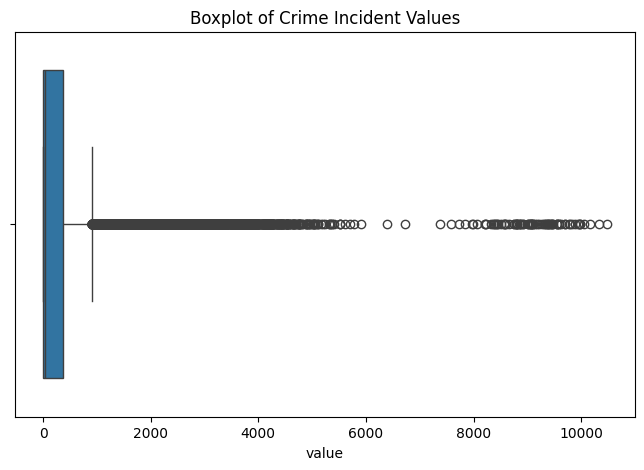

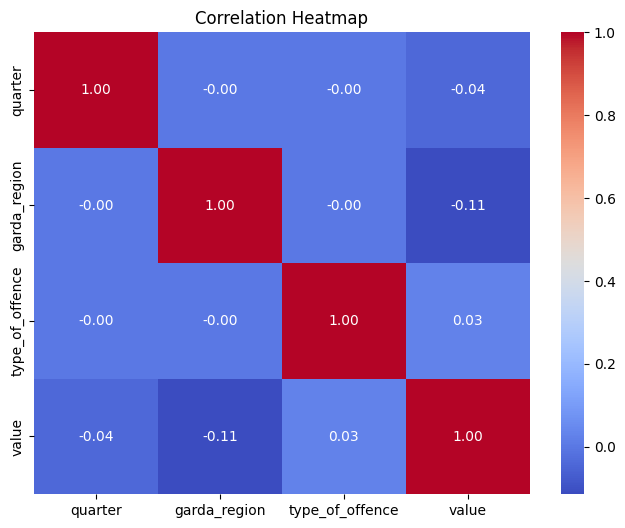

Garda_Region
10 Dublin Metropolitan Region    4208395.0
30 Eastern Region                2163294.0
40 Southern Region               2118124.0
20 North Western Region          1638274.0
Name: Crime_Value, dtype: float64


In [10]:
# Exploratory data analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('CrimeDataset.csv')

# Handling Missing Values
data.columns = data.columns.str.lower()

# Manual Renaming columns
data.rename(columns={
    'garda region': 'garda_region',
    'type of offence': 'type_of_offence',
    'statistic label': 'statistic_label',
    'unit': 'unit',
    'value': 'value'
}, inplace=True)


print("Missing values before:", data['value'].isna().sum())
data['value'].fillna(data['value'].median(), inplace=True)
print("Missing values after:", data['value'].isna().sum())

# Boxplot of Crime Values
plt.figure(figsize=(8,5))

# Create a boxplot to show the distribution of crime incident values
sns.boxplot(x=data['value'])
plt.title('Boxplot of Crime Incident Values')
plt.show()

# Correlation Heatmap
# Create a LabelEncoder instance to convert categorical columns into numeric format
encoded_data = data.copy()
le = LabelEncoder()
for col in ['quarter', 'garda_region', 'type_of_offence']:
    encoded_data[col] = le.fit_transform(encoded_data[col])


# Keep only numeric columns before correlation
numeric_data = encoded_data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Ploting correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

data = pd.read_csv('CrimeDataset.csv')

# Rename columns manually if needed
data.rename(columns={
    'Garda Region': 'Garda_Region',
    'VALUE': 'Crime_Value'
}, inplace=True)


region_crime = data.groupby('Garda_Region')['Crime_Value'].sum().sort_values(ascending=False)


# Print out the regions ranked by total crime value
print(region_crime)


# Create a bar chart to show the total crime value per Garda Region
import plotly.express as px

fig = px.bar(
    region_crime,
    x=region_crime.index,
    y=region_crime.values,
    labels={'x': 'Garda Region', 'y': 'Total Crime Value'},
    title='Top 10 Garda Regions by Total Crime Value'
)
fig.show()

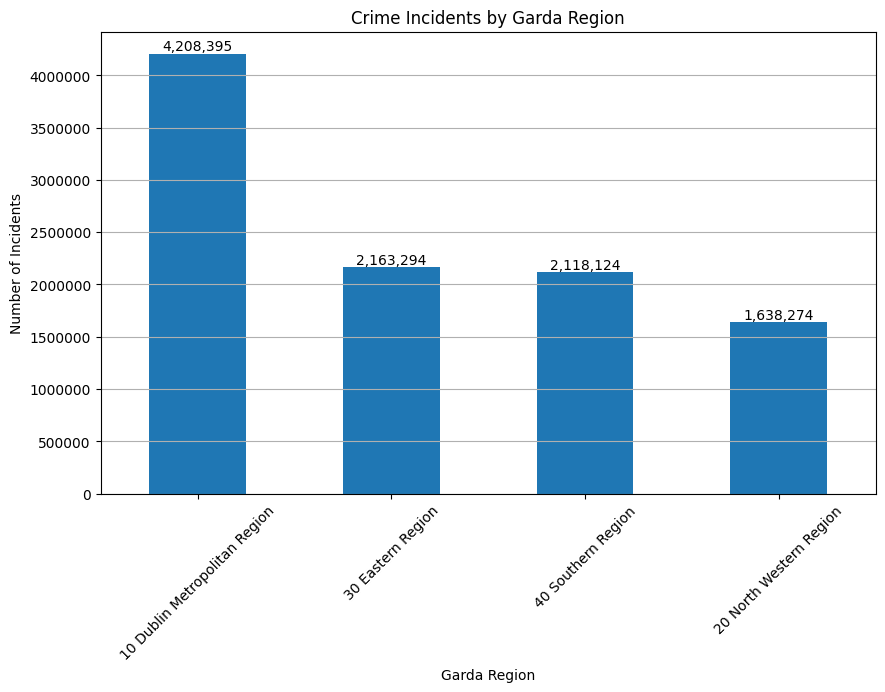

,value
garda_region,
10 Dublin Metropolitan Region,4208395.0
30 Eastern Region,2163294.0
40 Southern Region,2118124.0
20 North Western Region,1638274.0


In [11]:
#Read the crime dataset from a CSV file
data = pd.read_csv('CrimeDataset.csv')
data.drop(['STATISTIC Label', 'UNIT'], axis=1, inplace=True)
data.columns = data.columns.str.replace(' ', '_').str.lower()
data

# Aggregate Crime Incidents by Garda Region
# Group the data by Garda region and calculate the total number of crime incidents for each region
region_data = data.groupby('garda_region')['value'].sum().sort_values(ascending=False)

# Visualize Crime Incidents by Region

# Visualize Total Crime by Region Using a Bar Chart
plt.figure(figsize=(10, 6))
ax = region_data.plot(kind='bar')

# Add a descriptive title and axis labels to make the chart understandable
plt.title('Crime Incidents by Garda Region')
plt.xlabel('Garda Region')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ticklabel_format(style='plain', axis='y')

# Add data labels on top of the bars with a higher vertical alignment
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height() + 1000), ha='center', va='bottom')


# Display the final plot
plt.show()

# Output the aggregated data for reference or further analysis
region_data

In [12]:
# Load and Preprocess Data
data = pd.read_csv('CrimeDataset.csv')
data.drop(['STATISTIC Label', 'UNIT'], axis=1, inplace=True)
data.columns = data.columns.str.replace(' ', '_').str.lower()

data['date'] = pd.to_datetime(data['quarter'])
data = data[['date', 'value']].groupby('date').sum().reset_index()
data = data.set_index('date')
data.rename(columns={'value': 'crime_value'}, inplace=True)

print(data.head())

            crime_value
date                   
2003-01-01     112176.0
2003-04-01     114035.0
2003-07-01     116698.0
2003-10-01     113858.0
2004-01-01     117427.0


# Time Series Decomposition

In [13]:
# Import Required Libraries

# Import statsmodels for time series decomposition
import statsmodels.api as sm

# Import Plotly for interactive graphing
import plotly.graph_objs as go

data = pd.read_csv('CrimeDataset.csv')

data.rename(columns={
    'Quarter': 'quarter',
    'Crime_Value': 'crime_value',
}, inplace=True)

# Normalize column names
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

# Prepare Time Series Data
# Sort the data by quarter so the time series is in chronological order
data_sorted = data.sort_values('quarter')

print(data.columns)

# Aggregate crime value per quarter
quarterly_crime = data_sorted.groupby('quarter')['value'].sum()


# Time Series Decomposition
# Perform additive decomposition (can also try multiplicative)
decomposition = sm.tsa.seasonal_decompose(quarterly_crime, model='additive', period=4)

# Plot the Decomposed Components with Plotly
fig = go.Figure()

# Plot the original observed time series
fig.add_trace(go.Scatter(x=decomposition.observed.index, y=decomposition.observed.values, mode='lines', name='Observed'))

# # Plot the trend component
fig.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend.values, mode='lines', name='Trend'))

# Plot the seasonal component
fig.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal.values, mode='lines', name='Seasonality'))

# Plot the residual component (random noise)
fig.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid.values, mode='lines', name='Residuals'))


# Update the layout to make the plot clean and understandable
fig.update_layout(
    title="Time Series Decomposition of Crime Value",
    xaxis_title="Quarter",
    yaxis_title="Crime Value",
    template="plotly_white"
)

# Show the interactive plot in the notebook
fig.show()

Index(['statistic_label', 'quarter', 'garda_region', 'type_of_offence', 'unit',
       'value'],
      dtype='object')


In [14]:
# Import Required Plotly Modules
import plotly.graph_objs as go
import plotly.offline as pyo

# Clean and Standardize Column Names
data.rename(columns={
    'Garda Region': 'Garda_Region',
    'value': 'crime_value'
}, inplace=True)

# Prepare Time Series Data
trend_data = data.groupby('quarter')['crime_value'].sum()

# Create an Interactive Line Chart with Plotly
fig = go.Figure()

# Add a trace (line + markers) to the figure showing crime incidents over time
fig.add_trace(go.Scatter(
    x=trend_data.index,
    y=trend_data.values,
    mode='lines+markers',
    name='Crime Incidents',
    line=dict(color='royalblue', width=2),
    marker=dict(size=6)
))

# Customize Chart Layout
# Add a title and axis labels to make the chart informative
fig.update_layout(
    title='Interactive Time Series of Crime Incidents',
    xaxis_title='Quarter',
    yaxis_title='Number of Incidents',
    xaxis=dict(tickangle=45),

    # Rotate x-axis tick labels for better readability
    template='plotly_white',
    hovermode='x unified',

    # Set fixed width and height for consistent display
    width=1000,
    height=500
)

# Show plot
pyo.iplot(fig)

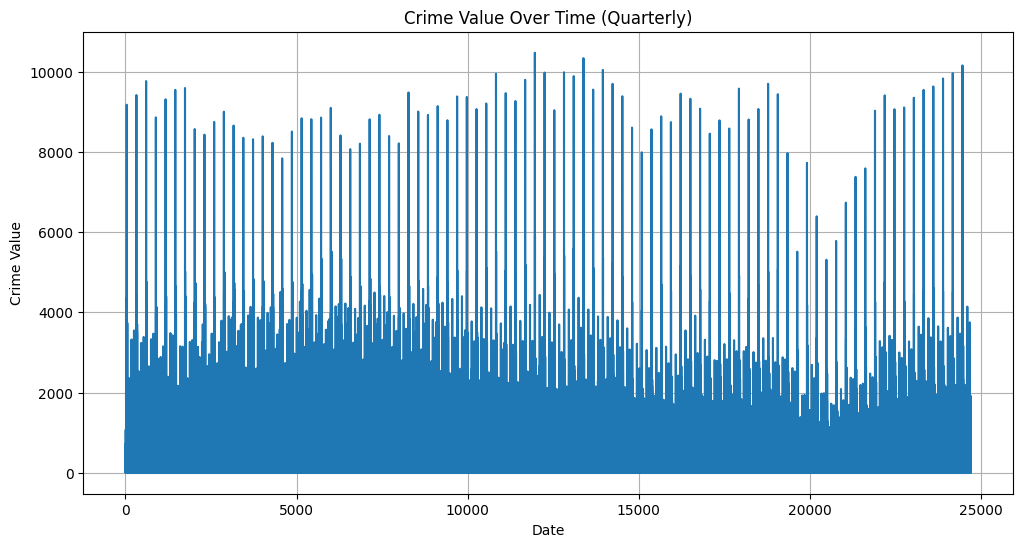

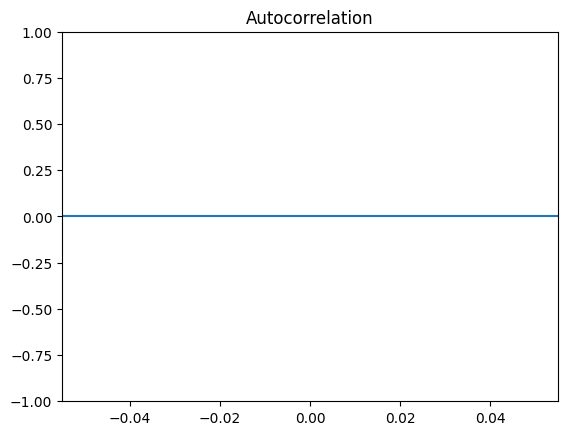

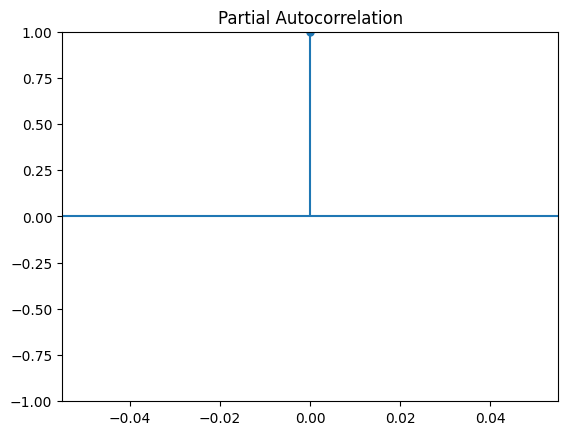

In [15]:
# Rename Columns for Consistency


# Standardize column names to avoid issues with spaces and ensure consistency
data.rename(columns={
    'Garda Region': 'Garda_Region',
    'value': 'crime_value'
}, inplace=True)

# Visualize Crime Value Over Time
plt.figure(figsize=(12,6))
plt.plot(data['crime_value'])
plt.title('Crime Value Over Time (Quarterly)')
plt.xlabel('Date')

# Plot the 'crime_value' column as a line graph
plt.ylabel('Crime Value')
plt.grid(True)

# Display the line plot
plt.show()

# Plot ACF and PACF to Analyze Time Series Patterns
# ACF (Autocorrelation Function) shows correlation of the time series with its past values
plot_acf(data['crime_value'])
plt.show()

# PACF (Partial Autocorrelation Function) shows correlation while removing influence of intermediate lags
plot_pacf(data['crime_value'])
plt.show()

In [16]:
# Import Plotly Express for creating an interactive heatmap
import plotly.express as px

df = data.copy()

# Create a Pivot Table for Heatmap

# Reshape the dataset into a pivot table where:
# - Rows represent Garda regions
# - Columns represent quarters
# - Cells contain the sum of crime values (incident counts)
# Missing values are filled with 0 to avoid gaps in the heatmap
pivot_table = df.pivot_table(index='garda_region', columns='quarter', values='crime_value', aggfunc='sum', fill_value=0)


# Plot the heatmap
fig = px.imshow(
    pivot_table,
    labels=dict(x="Quarter", y="Garda Region", color="Crime Count"),
    title="Crime Heatmap by Garda Region and Quarter",
    color_continuous_scale="Reds"
)

# Adjust Layout and Show Plot

# Set the plot size for better visibility
fig.update_layout(width=1000, height=800)
fig.show()

In [17]:
import pandas as pd
import plotly.express as px

# Filter Data for Dublin Metropolitan Region
dublin_data = data[data['garda_region'] == '10 Dublin Metropolitan Region']

# Group and Aggregate Offence Data
offence_data = dublin_data.groupby('type_of_offence')['crime_value'].sum().sort_values(ascending=False)

# Prepare Top 10 Offences for Visualization
top_offences = offence_data.head(10).reset_index()
top_offences.columns = ['Type of Offence', 'Number of Incidents']

# Create Interactive Bar Chart with Plotly

# Plot a bar chart showing the top 10 offence types in Dublin
fig = px.bar(
    top_offences,
    x='Type of Offence',
    y='Number of Incidents',
    title='Top 10 Crime Incidents by Type of Offence - Dublin Metropolitan Region',
    text='Number of Incidents',
    labels={'Number of Incidents': 'Number of Incidents'},
    template='plotly_white'
)

# Format the bar labels with commas and place them above the bars
fig.update_traces(texttemplate='%{text:,}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, yaxis_tickformat=',', uniformtext_minsize=8)

# Display the Chart
fig.show()

#ARIMA MODEL


ARIMA MAE: 346.60, RMSE: 845.35


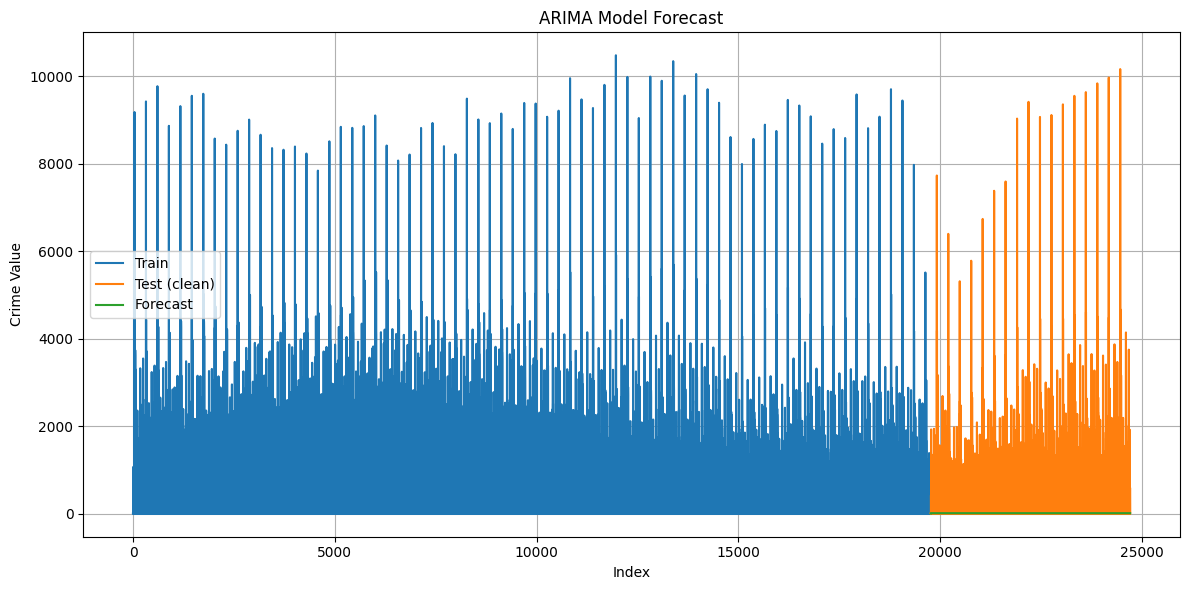

<Figure size 1000x600 with 0 Axes>

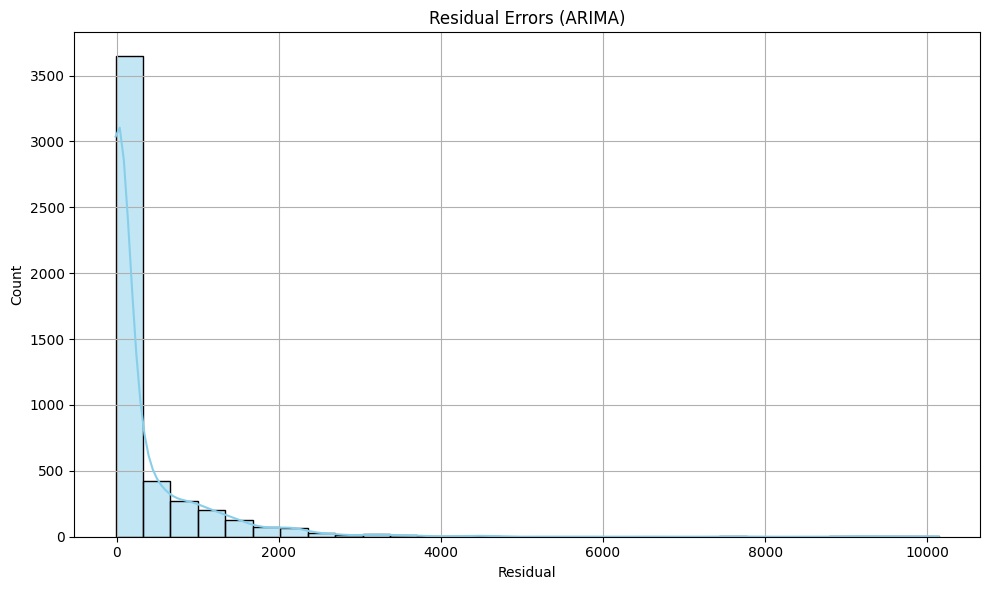

In [18]:
# Import Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split Data into Training and Testing Sets


# Use 80% of the data for training and the remaining 20% for testing
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit the ARIMA Model
model_arima = ARIMA(train['crime_value'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Forecast Future Crime Values
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Clean and Align Forecast and Test Data

# Remove any missing values from the test set to ensure clean comparison
test_clean = test.dropna(subset=['crime_value'])

# Match the forecast length to the cleaned test set
forecast_arima_clean = forecast_arima[:len(test_clean)]

# Evaluate Forecast Accuracy
mae_arima = mean_absolute_error(test_clean['crime_value'], forecast_arima_clean)
rmse_arima = np.sqrt(mean_squared_error(test_clean['crime_value'], forecast_arima_clean))

# Print the error values
print(f'ARIMA MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}')

# Visualize Forecast vs Actual Data

# Forecast plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['crime_value'], label='Train')
plt.plot(test_clean.index, test_clean['crime_value'], label='Test (clean)')
plt.plot(test_clean.index, forecast_arima_clean, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Index')
plt.ylabel('Crime Value')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Plot Forecast Residuals
residuals = test_clean['crime_value'] - forecast_arima_clean

# Plot a histogram with KDE (Kernel Density Estimate) to visualize error distribution
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Residual Errors (ARIMA)')
plt.xlabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


# Random Forest Model

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import plotly.graph_objects as go

# Load and preprocess dataset
crime_data = pd.read_csv('CrimeDataset.csv')
crime_data.columns = crime_data.columns.str.replace(' ', '_').str.lower()
crime_data['year'] = crime_data['quarter'].str[:4].astype(int)
crime_data['quarter_num'] = crime_data['quarter'].str[-1].astype(int)

# Aggregate data by year and quarter
crime_trend = crime_data.groupby(['year', 'quarter_num'])['value'].sum().reset_index()

# Create dummy variables for each quarter (Q1, Q2, Q3, Q4)
crime_trend = pd.get_dummies(crime_trend, columns=['quarter_num'], prefix='q')

# Features (X) and target (y)
X = crime_trend.drop(columns='value')
y = np.log1p(crime_trend['value'])  # Log transform target

# Time-series cross-validation (keeping temporal order)
tscv = TimeSeriesSplit(n_splits=3)

# Define the hyperparameter search space for Random Forest model
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=30, cv=tscv, verbose=0, random_state=42, n_jobs=-1)
rf_random.fit(X, y)

# Get the best model from the random search
best_rf = rf_random.best_estimator_

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the best model on the training data
best_rf.fit(X_train_rf, y_train_rf)

# Predict on the full dataset for plotting and evaluation
y_pred_rf_full_log = best_rf.predict(X)
predicted = np.expm1(y_pred_rf_full_log)  # inverse transform to original scale


# Predict on test set
y_pred_rf_log = best_rf.predict(X_test_rf)
y_pred_rf = np.expm1(y_pred_rf_log)
y_test_rf = np.expm1(y_test_rf)  # reverse log1p to match actual scale


# Create a dataframe for future quarters to forecast
last_year = X['year'].max()
future_data = pd.DataFrame([
    {'year': y, 'q_1': int(q==1), 'q_2': int(q==2), 'q_3': int(q==3), 'q_4': int(q==4)}
    for y in range(last_year + 1, last_year + 3)
    for q in range(1, 5)
])

# Predict crime values for future quarters
future_pred_log = best_rf.predict(future_data)
future_pred = np.expm1(future_pred_log)
future_data['predicted_value'] = future_pred

# Combine actual, predicted, and future data for plotting
fig = go.Figure()

# Plot the actual crime data (in original scale)
fig.add_trace(go.Scatter(
    x=pd.date_range(start=f'{X["year"].min()}Q1', periods=len(y), freq='Q'),
    y=np.expm1(y),
    mode='lines+markers',
    name='Actual'
))

# Plot the predicted crime data (fitted to the model)

fig.add_trace(go.Scatter(
    x=pd.date_range(start=f'{X["year"].min()}Q1', periods=len(predicted), freq='Q'),
    y=predicted,
    mode='lines+markers',
    name='Predicted (Fitted)'
))


# Plot the forecasted crime data for future quarters
fig.add_trace(go.Scatter(
    x=pd.date_range(start=f'{last_year+1}Q1', periods=8, freq='Q'),
    y=future_pred,
    mode='lines+markers',
    name='Forecast',
    line=dict(dash='dash', color='red')
))

# Customize the layout of the plot

fig.update_layout(
    title='Enhanced Crime Prediction in Dublin (Random Forest)',
    xaxis_title='Time',
    yaxis_title='Crime Incidents',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

# Inverse transforming the predicted and test values back to the original scale
y_pred_rf = np.expm1(y_pred_rf_log)  # Your RF predictions
y_test_rf_exp = np.expm1(y_test_rf)  # Transform test target back to original scale



# Model evaluation metrics
mae = mean_absolute_error(np.expm1(y), predicted)
r2 = r2_score(np.expm1(y), predicted)
print(f"RF -> MAE: {mae:.2f}, R^2: {r2:.2f}")

RF -> MAE: 4043.31, R^2: 0.84


# LSTM

Epoch 1/50
611/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072
Epoch 1: val_loss improved from inf to 0.00470, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0072 - val_loss: 0.0047
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062
Epoch 2: val_loss did not improve from 0.00470
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0062 - val_loss: 0.0050
Epoch 3/50
610/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050
Epoch 3: val_loss did not improve from 0.00470
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 4/50
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036
Epoch 4: val_loss improved from 0.00470 to 0.00427, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 5/50
615/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031
Epoch 5: val_loss improved from 0.00427 to 0.00407, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 6/50
611/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027
Epoch 6: val_loss improved from 0.00407 to 0.00342, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 7/50
613/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024
Epoch 7: val_loss improved from 0.00342 to 0.00325, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 8/50
613/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022
Epoch 8: val_loss did not improve from 0.00325
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 9/50
612/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020
Epoch 9: val_loss did not improve from 0.00325
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 10/50
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021
Epoch 10: val_loss improved from 0.00325 to 0.00325, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 11/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019
Epoch 11: val_loss did not improve from 0.00325
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 12/50
610/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017
Epoch 12: val_loss improved from 0.00325 to 0.00252, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 13/50
610/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016
Epoch 13: val_loss did not improve from 0.00252
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 14/50
609/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 14: val_loss did not improve from 0.00252
618/618 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 15/50
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 15: val_loss did not improve from 0.00252
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 16/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 16: val_loss did not improve from 0.00252
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 17/50
609/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 17: val_loss did not improve from 0.00252
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - lo

618/618 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 20/50
613/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 20: val_loss improved from 0.00238 to 0.00211, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 21/50
609/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 21: val_loss did not improve from 0.00211
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 22/50
613/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 22: val_loss did not improve from 0.00211
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 23/50
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 23: val_loss improved from 0.00211 to 0.00196, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 24/50
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3002e-04
Epoch 24: val_loss improved from 0.00196 to 0.00190, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 9.3002e-04 - val_loss: 0.0019
Epoch 25/50
611/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2390e-04
Epoch 25: val_loss improved from 0.00190 to 0.00179, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9.2322e-04 - val_loss: 0.0018
Epoch 26/50
609/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5077e-04
Epoch 26: val_loss improved from 0.00179 to 0.00166, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 7.5110e-04 - val_loss: 0.0017
Epoch 27/50
616/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9056e-04
Epoch 27: val_loss did not improve from 0.00166
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 6.9057e-04 - val_loss: 0.0018
Epoch 28/50
609/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0699e-04
Epoch 28: val_loss did not improve from 0.00166
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.0734e-04 - val_loss: 0.0017
Epoch 29/50
610/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1891e-04
Epoch 29: val_loss improved from 0.00166 to 0.00163, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 6.1880e-04 - val_loss: 0.0016
Epoch 30/50
614/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3229e-04
Epoch 30: val_loss improved from 0.00163 to 0.00159, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 5.3243e-04 - val_loss: 0.0016
Epoch 31/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6331e-04
Epoch 31: val_loss did not improve from 0.00159
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.6327e-04 - val_loss: 0.0017
Epoch 32/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6198e-04
Epoch 32: val_loss did not improve from 0.00159
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.6193e-04 - val_loss: 0.0016
Epoch 33/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6602e-04
Epoch 33: val_loss improved from 0.00159 to 0.00129, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.6607e-04 - val_loss: 0.0013
Epoch 34/50
615/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0636e-04
Epoch 34: val_loss did not improve from 0.00129
618/618 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 5.0627e-04 - val_loss: 0.0013
Epoch 35/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7774e-04
Epoch 35: val_loss did not improve from 0.00129
618/618 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 4.7776e-04 - val_loss: 0.0014
Epoch 36/50
613/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5281e-04
Epoch 36: val_loss improved from 0.00129 to 0.00127, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.5273e-04 - val_loss: 0.0013
Epoch 37/50
610/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5529e-04
Epoch 37: val_loss improved from 0.00127 to 0.00119, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.5525e-04 - val_loss: 0.0012
Epoch 38/50
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1270e-04
Epoch 38: val_loss did not improve from 0.00119
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4.1274e-04 - val_loss: 0.0013
Epoch 39/50
617/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8660e-04
Epoch 39: val_loss improved from 0.00119 to 0.00115, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 4.8644e-04 - val_loss: 0.0012
Epoch 40/50
616/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9898e-04
Epoch 40: val_loss did not improve from 0.00115
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.9892e-04 - val_loss: 0.0012
Epoch 41/50
611/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8091e-04
Epoch 41: val_loss improved from 0.00115 to 0.00101, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.8091e-04 - val_loss: 0.0010
Epoch 42/50
611/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4307e-04
Epoch 42: val_loss did not improve from 0.00101
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4.4257e-04 - val_loss: 0.0012
Epoch 43/50
615/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9043e-04
Epoch 43: val_loss did not improve from 0.00101
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.9052e-04 - val_loss: 0.0013
Epoch 44/50
613/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6718e-04
Epoch 44: val_loss did not improve from 0.00101
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.6744e-04 - val_loss: 0.0010
Epoch 45/50
615/618 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8468e-04
Epoch 45: val_loss did not improve from 0.00101
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.8463e-04 - val_loss: 0.0010
Epoch 46/50
613/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4286e-04
Epoch 46: val_loss did not improve from 0.00101
618/6

618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.5766e-04 - val_loss: 9.9511e-04
Epoch 50/50
615/618 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4720e-04
Epoch 50: val_loss improved from 0.00100 to 0.00090, saving model to best_lstm.h5


618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.4721e-04 - val_loss: 8.9854e-04
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM MAE: 146.03, RMSE: 313.99


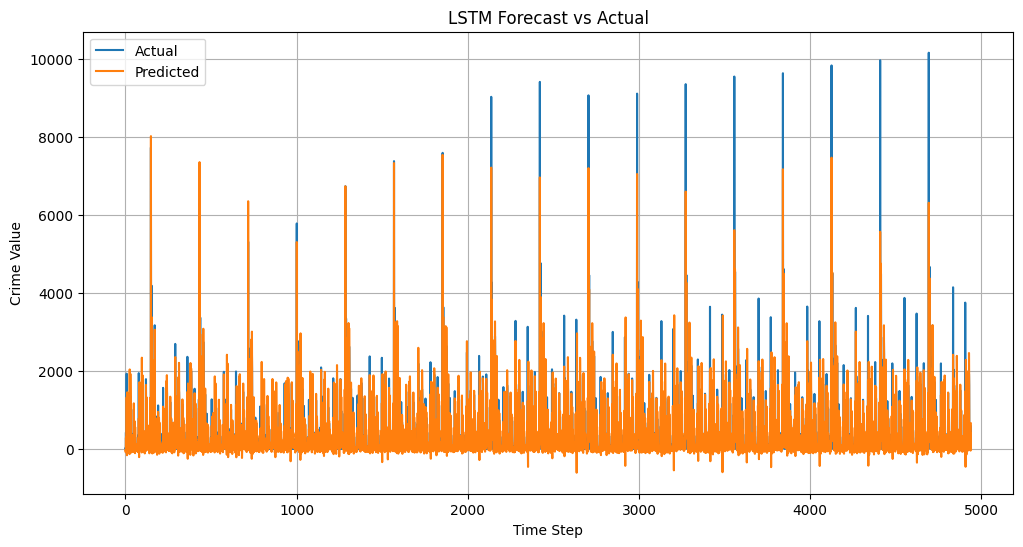

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM MAE: 146.03
LSTM RMSE: 313.99
LSTM MAPE: inf%


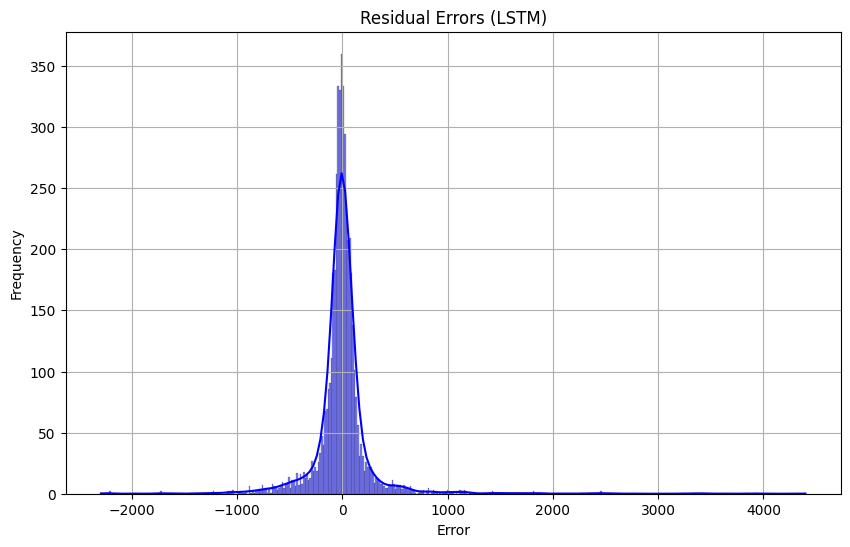

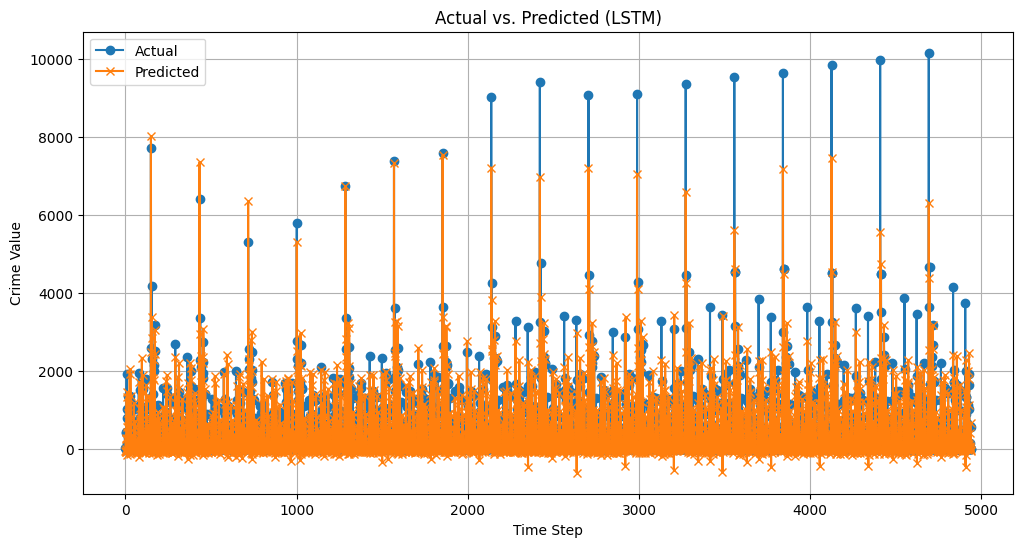

In [20]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint

# Prepare your data
# Assume 'data' is the DataFrame containing the 'crime_value' column

data['crime_value'] = data['crime_value'].fillna(method='ffill')

# Reshape the 'crime_value' column so it's ready for scaling
values = data['crime_value'].values.reshape(-1, 1)

# Scale the data between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Create LSTM sequences
# Function to create sequences for LSTM input, with a fixed sequence length
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

# Set the sequence length for LSTM input

sequence_length = 10
X, y = create_sequences(scaled_values, sequence_length)

# Split data into train/test sets

# Use 80% of the data for training and 20% for testing
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
# Create the LSTM model using Keras
model_lstm = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model with Adam optimizer and Mean Squared Error loss function
model_lstm.compile(optimizer='adam', loss='mse')

# Set up checkpoint to save best model

# Save the best model (based on validation loss) during training
checkpoint = ModelCheckpoint('best_lstm.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the LSTM model for 50 epochs, using 32 samples per batch
history = model_lstm.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint],
    verbose=1
)

# Load best weights and predict

# Load the best model (based on validation loss)
model_lstm.load_weights('best_lstm.h5')
predictions = model_lstm.predict(X_test)

# Inverse transform the predictions and the actual test data back to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate performance

# Calculate performance metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f'LSTM MAE: {mae:.2f}, RMSE: {rmse:.2f}')

# Plot the actual values vs. the predicted values for comparison
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Crime Value')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict with LSTM
lstm_predictions = model_lstm.predict(X_test)

# Inverse transform if scaling was applied
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Additional Metrics
mae_lstm = mean_absolute_error(y_test_actual, lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))
mape_lstm = np.mean(np.abs((y_test_actual - lstm_predictions) / y_test_actual)) * 100

print(f'LSTM MAE: {mae_lstm:.2f}')
print(f'LSTM RMSE: {rmse_lstm:.2f}')
print(f'LSTM MAPE: {mape_lstm:.2f}%')

# Plot residuals (errors)
residuals_lstm = y_test_actual.flatten() - lstm_predictions.flatten()

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lstm, kde=True, color='blue')
plt.title('Residual Errors (LSTM)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Actual vs. Predicted Line Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', marker='o')
plt.plot(lstm_predictions, label='Predicted', marker='x')
plt.title('Actual vs. Predicted (LSTM)')
plt.xlabel('Time Step')
plt.ylabel('Crime Value')
plt.legend()
plt.grid(True)
plt.show()


# Evaluation Plots

In [21]:
import plotly.graph_objects as go

# LSTM Interactive Plot
# Create a time step list for LSTM predictions
time_steps_lstm = list(range(len(y_test_actual)))


# Initialize a Plotly figure for the LSTM plot
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=time_steps_lstm, y=y_test_actual.flatten(), mode='lines+markers', name='Actual (LSTM)'))
fig1.add_trace(go.Scatter(x=time_steps_lstm, y=lstm_predictions.flatten(), mode='lines+markers', name='Predicted (LSTM)'))

# Customize the layout for the LSTM plot
fig1.update_layout(
    title='LSTM - Actual vs Predicted (Interactive)',
    xaxis_title='Time Step',
    yaxis_title='Crime Value',
    hovermode='x unified',
    template='plotly_white'
)

# Show the interactive LSTM plot
fig1.show()

# Random Forest Interactive Plot

# Create a time range for Random Forest predictions based on the 'year' and 'quarter'
fig_rf = go.Figure()


# Plot actual values (Random Forest) with markers at each time step
fig_rf.add_trace(go.Scatter(x=pd.date_range(start=f'{X_test_rf["year"].min()}Q1', periods=len(y_test_rf), freq='Q'),
                            y=y_test_rf.values,
                            mode='lines+markers',
                            name='Actual (RF)'))

#  Plot predicted values (Random Forest) with markers at each time step
fig_rf.add_trace(go.Scatter(x=pd.date_range(start=f'{X_test_rf["year"].min()}Q1', periods=len(y_test_rf), freq='Q'),
                            y=y_pred_rf,
                            mode='lines+markers',
                            name='Predicted (RF)'))

# Customize the layout for the Random Forest plot

fig_rf.update_layout(
    title='Random Forest - Actual vs Predicted (Interactive)',
    xaxis_title='Time Step',
    yaxis_title='Crime Value',
    hovermode='x unified',
    template='plotly_white'
)

# Show the interactive Random Forest plot
fig_rf.show()


# ARIMA Interactive Plot
time_steps_arima = test_clean.index if 'test_clean' in locals() else test.index

# Initialize a Plotly figure for the ARIMA plot
fig3 = go.Figure()

# Add the actual crime values (ARIMA) as a line plot with markers
fig3.add_trace(go.Scatter(x=time_steps_arima, y=test['crime_value'], mode='lines+markers', name='Actual (ARIMA)'))

# Add the forecasted values (ARIMA) as a line plot with markers
fig3.add_trace(go.Scatter(x=time_steps_arima, y=forecast_arima[:len(time_steps_arima)], mode='lines+markers', name='Forecast (ARIMA)'))

# Customize the layout for the ARIMA plot
fig3.update_layout(
    title='ARIMA - Actual vs Forecast (Interactive)',
    xaxis_title='Time Step',
    yaxis_title='Crime Value',
    hovermode='x unified',
    template='plotly_white'
)

# Show the interactive ARIMA plot
fig3.show()


# Statistical Comparison Using Paired t-test

In [22]:
from scipy.stats import ttest_rel
import numpy as np

# Flatten Arrays for Comparison

# Flatten the predicted and actual values for Random Forest
y_pred_rf = np.array(y_pred_rf).flatten()
y_test_rf = np.array(y_test_rf).flatten()

# Flatten the predicted and actual values for LSTM
pred_lstm = np.array(predictions).flatten()
y_lstm = np.array(y_test_actual).flatten()

# Align Lengths of Arrays

min_len = min(len(y_pred_rf), len(pred_lstm), len(y_test_rf), len(y_lstm))
y_pred_rf = y_pred_rf[:min_len]
y_test_rf = y_test_rf[:min_len]
pred_lstm = pred_lstm[:min_len]
y_lstm = y_lstm[:min_len]

# Calculate errors

# Calculate the residuals (errors) for both Random Forest and LSTM
errors_rf = y_test_rf - y_pred_rf
errors_lstm = y_lstm - pred_lstm

# Paired t-test

# Perform a paired t-test to determine if there's a significant difference between the errors of both models
t_stat, p_val = ttest_rel(errors_rf, errors_lstm)

# Display Results

print("Paired t-test between Random Forest and LSTM errors:")
print("t-statistic:", t_stat)
print("p-value:", p_val)


# Interpret the result
if p_val < 0.05:
    print("Statistically significant difference between models.")
else:
    print("No statistically significant difference.")

Paired t-test between Random Forest and LSTM errors:
t-statistic: -4.525857953635241
p-value: 0.0002987720981222068
Statistically significant difference between models.


In [23]:
from scipy.stats import ttest_rel
import numpy as np

# Flatten LSTM and actual values, use .values for ARIMA (Series)
min_len = min(len(y_test_actual), len(lstm_predictions), len(forecast_arima_clean))

y_true = y_test_actual[:min_len].flatten()
lstm_preds = lstm_predictions[:min_len].flatten()
arima_preds = forecast_arima_clean.values[:min_len]  # fixed line

# Calculate absolute errors
lstm_errors = np.abs(y_true - lstm_preds)
arima_errors = np.abs(y_true - arima_preds)

# Perform paired t-test
t_stat, p_value = ttest_rel(lstm_errors, arima_errors)

print(f"Paired t-test between LSTM and ARIMA errors:")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.6f}")

if p_value < 0.05:
    print("The difference is statistically significant. LSTM performs better than ARIMA.")
else:
    print("No statistically significant difference found between LSTM and ARIMA.")



Paired t-test between LSTM and ARIMA errors:
t-statistic = -22.8623, p-value = 0.000000
The difference is statistically significant. LSTM performs better than ARIMA.


# Model Performance Summary

In [24]:
# Summary Table

results = pd.DataFrame({
    'Model': ['ARIMA', 'LSTM'],
    'MAE': [mae_arima, mae_lstm],
    'RMSE': [rmse_arima, rmse_lstm]
})
print(results)


   Model         MAE        RMSE
0  ARIMA  346.604836  845.345169
1   LSTM  146.033844  313.994775
